In [39]:
%matplotlib inline
from sklearn import datasets, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
from matplotlib import pyplot as pl 
import math
import pandas as pd

In [2]:
data = datasets.load_digits()

In [34]:
X = data["data"]
y = data["target"]

In [4]:
tree = DecisionTreeClassifier()
score = model_selection.cross_val_score(tree, X, y, cv=10)
np.mean(score)

0.831374922408442

In [11]:
bagging = BaggingClassifier(n_estimators=100)
score_bag = model_selection.cross_val_score(bagging, X, y, cv=10)
score_bag.mean()

0.925397268777157

In [6]:
d = X.shape[1]
d = int(math.sqrt(d))

In [7]:
bagging_with_d = BaggingClassifier(n_estimators=100, max_features=d)
score_bag_with_d = model_selection.cross_val_score(bagging_with_d, X, y, cv=10)
score_bag_with_d.mean()

0.929885164494103

In [9]:
bagging_with_random = BaggingClassifier(DecisionTreeClassifier(max_features=d), n_estimators=100)
score_bag_with_rand = model_selection.cross_val_score(bagging_with_random, X, y, cv=10)
score_bag_with_rand.mean()

0.9471229050279328

In [15]:
random_forest = RandomForestClassifier(max_features=d, n_estimators=100)
score_random_forest = model_selection.cross_val_score(random_forest, X, y, cv=10)
score_random_forest.mean()

0.9454593420235877

In [35]:
a = range(5,101,5)
y_plot = []
for n in a:
    y_plot.append(model_selection.cross_val_score(RandomForestClassifier(max_features=d, n_estimators=n), X, y, cv=10).mean())

In [47]:
dict_r = dict(zip(a, y_plot))

In [172]:
m = {x1: y1 for x1, y1 in filter(lambda x: dict_r[x[0]] == max(dict_r.values()), dict_r.items())}
max_n = list(m.keys())[0]

In [163]:
print(y_plot)

[0.8820453134698945, 0.9148510242085661, 0.9293327126008689, 0.9270856610800745, 0.9432402234636872, 0.9404624456859093, 0.9443513345747983, 0.9432247051520793, 0.9482402234636871, 0.9410024829298571, 0.9432371198013655, 0.9443513345747983, 0.9471260086902544, 0.9510211049037863, 0.9526908752327745, 0.9482495344506517, 0.9504624456859092, 0.9515859714463065, 0.9499099937926753, 0.9510304158907511]


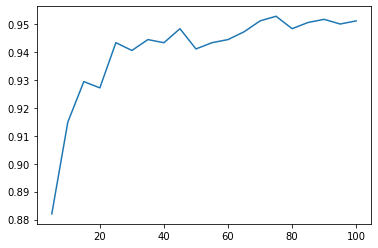

In [40]:
pl.plot(a, y_plot)

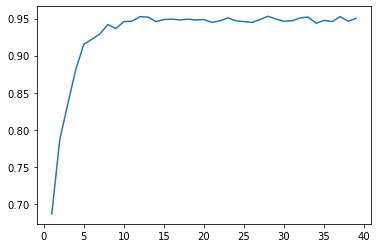

In [173]:
a = range(1,40,1)
y_plot_depth = []
for n in a:
    y_plot_depth.append(model_selection.cross_val_score(RandomForestClassifier(max_features=d, n_estimators=max_n, max_depth=n), X, y, cv=10).mean())
    
pl.plot(a,y_plot_depth)    

In [174]:
dict_d = dict(zip(a, y_plot_depth))

In [190]:
best_depth = list(x for x, _ in filter(lambda x: dict_d[x[0]]==max(dict_d.values()), dict_d.items()))[0]

In [198]:
a_f = range(1,64,5)
y_f = []
for i in a_f:
    y_f.append(model_selection.cross_val_score(RandomForestClassifier(n_estimators=max_n, max_depth=best_depth,max_features=i),X,y,cv=10).mean())

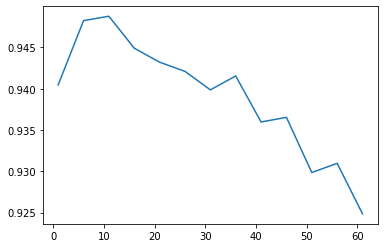

In [199]:
pl.plot(a_f,y_f)